<a href="https://colab.research.google.com/github/jeno22ndr/Eco-Tourism-Analysis-with-primary-data/blob/main/Data_Genration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_excel('Book1.xlsx')
df.info()

# Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 20 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Timestamp                                                                                                            201 non-null    object 
 1   What is your age group?                                                                                              201 non-null    object 
 2   What is your highest level of education?                                                                             201 non-null    object 
 3   How familiar are you with eco-tourism?                                                                               201 non-null    object 
 4   Have you ever 

,How would you rate your environmental awareness after participating in eco-tourism activities?,How likely are you to recommend eco-tourism experiences to others?
count,94.000000,94.000000
mean,3.765957,2.904255
std,1.248014,1.414739
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Book1.xlsx')
print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
# Handle missing values in all columns for robustness, although we will focus on categorical later
# For simplicity, let's fill missing values in object columns with a placeholder 'Unknown'
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        # For numerical columns, you might choose a different strategy, e.g., median or mean
        df[col] = df[col].fillna(df[col].median())

print("Missing values handled.")

Missing values handled.


In [ ]:
# Identify categorical columns to include (excluding Timestamp and open-ended)
# We'll assume columns with object dtype are categorical, except for the open-ended ones.
# Based on previous analysis, we know which columns are open-ended text.

open_ended_cols = [
    'What, if anything, do you think could improve eco-tourism activities? (Open-ended)',
    'In your opinion, how can eco-tourism be more widely adopted to foster greater environmental awareness? (Open-ended)'
]
timestamp_col = 'Timestamp'

categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in open_ended_cols and col != timestamp_col]

# Select only the categorical columns
df_categorical_selected = df[categorical_cols].copy()

print("Selected categorical columns:")
print(categorical_cols)
print("\nFirst 5 rows of selected categorical data:")
display(df_categorical_selected.head())

Selected categorical columns:
['What is your age group?', 'What is your highest level of education?', 'How familiar are you with eco-tourism?', 'Have you ever participated in an eco-tourism activity?', 'How many eco-tourism experiences have you participated in?', 'What types of eco-tourism activities have you participated in? (Select all that apply)', 'Did your eco-tourism experience influence your behavior towards more sustainable living?', 'Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply)', 'How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?', 'What aspects of eco-tourism had the greatest impact on you? (Select all that apply)', 'To what extent do you believe eco-tourism can contribute to environmental conservation?', 'What motivates you most to participate in eco-tourism? (Select all that apply)', 'Do you believe your eco-tourism experience will have a lasting impact on your

,What is your age group?,What is your highest level of education?,How familiar are you with eco-tourism?,Have you ever participated in an eco-tourism activity?,How many eco-tourism experiences have you participated in?,What types of eco-tourism activities have you participated in? (Select all that apply),Did your eco-tourism experience influence your behavior towards more sustainable living?,Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply),How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?,What aspects of eco-tourism had the greatest impact on you? (Select all that apply),To what extent do you believe eco-tourism can contribute to environmental conservation?,What motivates you most to participate in eco-tourism? (Select all that apply),Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?,Which area of your life do you see eco-tourism impacting the most?,Would you be interested in participating in future eco-tourism experiences?
0,25 - 34,Master's Degree,Somewhat familiar,Yes,1,"Sustainable farming visits, Hiking or nature w...","Yes, moderately","Reducing plastic use, Conserving water and ene...",Good,"Hands-on learning experiences, Interaction wit...",It can make a moderate difference,"Learning about environmental conservation, Int...","Yes, absolutely","Consumer habits (e.g., supporting eco-friendly...","Yes, definitely"
1,18 - 24,Bachelor's Degree,Very familiar,No,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
2,Above 44,Master's Degree,Very familiar,No,1,Educational workshops on sustainability,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
3,Under 18,High School,Somewhat familiar,No,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
4,Under 18,High School,Not familiar,No,2,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Maybe, but it's too early to tell","Consumer habits (e.g., supporting eco-friendly...",Maybe


In [ ]:
# Apply one-hot encoding
df_categorical_encoded = pd.get_dummies(df_categorical_selected, drop_first=False) # Keep all columns for decoding later

print("Categorical data one-hot encoded.")
print("\nFirst 5 rows of one-hot encoded categorical data:")
display(df_categorical_encoded.head())
print("\nShape of one-hot encoded data:", df_categorical_encoded.shape)

Categorical data one-hot encoded.

First 5 rows of one-hot encoded categorical data:


,What is your age group?_18 - 24,What is your age group?_25 - 34,What is your age group?_35 - 44,What is your age group?_Above 44,What is your age group?_Under 18,What is your highest level of education?_Bachelor's Degree,What is your highest level of education?_Diploma in pharmacy,What is your highest level of education?_Final Year,What is your highest level of education?_High School,What is your highest level of education?_Master's Degree,...,"Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Maybe, but it's too early to tell","Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_No, probably not","Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Yes, absolutely","Which area of your life do you see eco-tourism impacting the most?_Advocacy (e.g., promoting sustainability to others)","Which area of your life do you see eco-tourism impacting the most?_Consumer habits (e.g., supporting eco-friendly products)","Which area of your life do you see eco-tourism impacting the most?_Home practices (e.g., recycling, energy saving)","Which area of your life do you see eco-tourism impacting the most?_Travel choices (e.g., eco-friendly lodging, sustainable tours)",Would you be interested in participating in future eco-tourism experiences?_Maybe,Would you be interested in participating in future eco-tourism experiences?_No,"Would you be interested in participating in future eco-tourism experiences?_Yes, definitely"
0,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
3,False,False,False,False,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
4,False,False,False,False,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False



Shape of one-hot encoded data: (201, 127)


In [ ]:
!pip install sdv

In [ ]:
from sdv.single_table.ctgan import CTGAN

# Instantiate a CTGAN model
# We can potentially tune parameters here if needed based on initial analysis, but let's start with defaults
model = CTGAN()

# Fit the model to the one-hot encoded categorical data
print("Training CTGAN model...")
model.fit(df_categorical_encoded)
print("Model training complete.")

Training CTGAN model...
Model training complete.


In [ ]:
# Generate 1000 synthetic samples
print("Generating synthetic data...")
synthetic_categorical_encoded = model.sample(1000)
print("Synthetic data generation complete.")
print("\nFirst 5 rows of generated synthetic encoded data:")
display(synthetic_categorical_encoded.head())
print("\nShape of generated synthetic encoded data:", synthetic_categorical_encoded.shape)

Generating synthetic data...
Synthetic data generation complete.

First 5 rows of generated synthetic encoded data:


,What is your age group?_18 - 24,What is your age group?_25 - 34,What is your age group?_35 - 44,What is your age group?_Above 44,What is your age group?_Under 18,What is your highest level of education?_Bachelor's Degree,What is your highest level of education?_Diploma in pharmacy,What is your highest level of education?_Final Year,What is your highest level of education?_High School,What is your highest level of education?_Master's Degree,...,"Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Maybe, but it's too early to tell","Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_No, probably not","Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Yes, absolutely","Which area of your life do you see eco-tourism impacting the most?_Advocacy (e.g., promoting sustainability to others)","Which area of your life do you see eco-tourism impacting the most?_Consumer habits (e.g., supporting eco-friendly products)","Which area of your life do you see eco-tourism impacting the most?_Home practices (e.g., recycling, energy saving)","Which area of your life do you see eco-tourism impacting the most?_Travel choices (e.g., eco-friendly lodging, sustainable tours)",Would you be interested in participating in future eco-tourism experiences?_Maybe,Would you be interested in participating in future eco-tourism experiences?_No,"Would you be interested in participating in future eco-tourism experiences?_Yes, definitely"
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True



Shape of generated synthetic encoded data: (1000, 127)


In [ ]:
# Decode the one-hot encoded synthetic data back to categorical format
decoded_synthetic_categorical_data = pd.DataFrame()

for col in df_categorical_selected.columns:
    # Find all one-hot encoded columns corresponding to the original column
    encoded_cols = [c for c in synthetic_categorical_encoded.columns if c.startswith(f'{col}_')]

    if encoded_cols:
        # Find the column with the maximum value for each row among the encoded columns
        # idxmax finds the column name with the maximum value
        decoded_synthetic_categorical_data[col] = synthetic_categorical_encoded[encoded_cols].idxmax(axis=1)

        # Remove the original column name and the '_' separator to get the category value
        decoded_synthetic_categorical_data[col] = decoded_synthetic_categorical_data[col].apply(lambda x: x.replace(f'{col}_', ''))
    # Note: If any original categorical column resulted in no encoded columns (unlikely with get_dummies on object dtype),
    # this loop would skip it. Based on previous steps, this should correctly decode all selected categorical columns.


print("Synthetic categorical data decoded.")
print("\nFirst 5 rows of decoded synthetic categorical data:")
display(decoded_synthetic_categorical_data.head())
print("\nShape of decoded synthetic categorical data:", decoded_synthetic_categorical_data.shape)

Synthetic categorical data decoded.

First 5 rows of decoded synthetic categorical data:


,What is your age group?,What is your highest level of education?,How familiar are you with eco-tourism?,Have you ever participated in an eco-tourism activity?,How many eco-tourism experiences have you participated in?,What types of eco-tourism activities have you participated in? (Select all that apply),Did your eco-tourism experience influence your behavior towards more sustainable living?,Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply),How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?,What aspects of eco-tourism had the greatest impact on you? (Select all that apply),To what extent do you believe eco-tourism can contribute to environmental conservation?,What motivates you most to participate in eco-tourism? (Select all that apply),Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?,Which area of your life do you see eco-tourism impacting the most?,Would you be interested in participating in future eco-tourism experiences?
0,18 - 24,Bachelor's Degree,Not familiar,No,0,Eco-lodging experiences,"No, not really",Conserving water and energy,Excellent,Educational workshops,It can make a huge difference,Adventure and nature-based activities,"Maybe, but it's too early to tell","Advocacy (e.g., promoting sustainability to ot...",Maybe
1,18 - 24,Bachelor's Degree,Not familiar,No,0,Eco-lodging experiences,"No, not really",Conserving water and energy,Excellent,Educational workshops,It can make a huge difference,Adventure and nature-based activities,"Maybe, but it's too early to tell","Advocacy (e.g., promoting sustainability to ot...",Maybe
2,18 - 24,Bachelor's Degree,Not familiar,No,0,Eco-lodging experiences,"No, not really",Conserving water and energy,Excellent,Educational workshops,It can make a huge difference,Adventure and nature-based activities,"Maybe, but it's too early to tell","Advocacy (e.g., promoting sustainability to ot...",Maybe
3,18 - 24,Bachelor's Degree,Not familiar,No,0,Eco-lodging experiences,"No, not really",Conserving water and energy,Excellent,Educational workshops,It can make a huge difference,Adventure and nature-based activities,"Maybe, but it's too early to tell","Advocacy (e.g., promoting sustainability to ot...",Maybe
4,18 - 24,Bachelor's Degree,Not familiar,No,0,Eco-lodging experiences,"No, not really",Conserving water and energy,Excellent,Educational workshops,It can make a huge difference,Adventure and nature-based activities,"Maybe, but it's too early to tell","Advocacy (e.g., promoting sustainability to ot...",Maybe



Shape of decoded synthetic categorical data: (1000, 15)


Starting analysis and interpretation of synthetic data...

Value Counts Comparison:

--- What is your age group? ---
Original Data:


,proportion
What is your age group?,
18 - 24,0.462687
25 - 34,0.159204
35 - 44,0.134328
Under 18,0.129353
Above 44,0.114428


Synthetic Data:


,proportion
What is your age group?,
18 - 24,1.0



--- What is your highest level of education? ---
Original Data:


,proportion
What is your highest level of education?,
Bachelor's Degree,0.517413
High School,0.278607
Master's Degree,0.164179
PhD,0.024876
Diploma in pharmacy,0.009950
Final Year,0.004975


Synthetic Data:


,proportion
What is your highest level of education?,
Bachelor's Degree,1.0



--- How familiar are you with eco-tourism? ---
Original Data:


,proportion
How familiar are you with eco-tourism?,
Somewhat familiar,0.502488
Very familiar,0.388060
Not familiar,0.109453


Synthetic Data:


,proportion
How familiar are you with eco-tourism?,
Not familiar,1.0



--- Have you ever participated in an eco-tourism activity? ---
Original Data:


,proportion
Have you ever participated in an eco-tourism activity?,
No,0.532338
Yes,0.467662


Synthetic Data:


,proportion
Have you ever participated in an eco-tourism activity?,
No,1.0



--- How many eco-tourism experiences have you participated in? ---
Original Data:


,proportion
How many eco-tourism experiences have you participated in?,
0.0,0.154229
1.0,0.268657
2.0,0.507463
3.0,0.029851
4.0,0.009950
5.0,0.029851


Synthetic Data:


,proportion
How many eco-tourism experiences have you participated in?,
0,1.0



--- What types of eco-tourism activities have you participated in? (Select all that apply) ---
Original Data:


,proportion
What types of eco-tourism activities have you participated in? (Select all that apply),
Unknown,0.522388
Hiking or nature walks in conservation areas,0.069652
Sustainable farming visits,0.064677
"Wildlife conservation tours, Hiking or nature walks in conservation areas",0.044776
Wildlife conservation tours,0.044776
"Wildlife conservation tours, Sustainable farming visits, Hiking or nature walks in conservation areas, Educational workshops on sustainability",0.034826
Educational workshops on sustainability,0.029851
Eco-lodging experiences,0.024876
"Wildlife conservation tours, Sustainable farming visits, Hiking or nature walks in conservation areas",0.019900


Synthetic Data:


,proportion
What types of eco-tourism activities have you participated in? (Select all that apply),
Eco-lodging experiences,1.0



--- Did your eco-tourism experience influence your behavior towards more sustainable living? ---
Original Data:


,proportion
Did your eco-tourism experience influence your behavior towards more sustainable living?,
Unknown,0.532338
"Yes, significantly",0.223881
"Yes, moderately",0.184080
"No, not really",0.059701


Synthetic Data:


,proportion
Did your eco-tourism experience influence your behavior towards more sustainable living?,
"No, not really",1.0



--- Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply) ---
Original Data:


,proportion
Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply),
Unknown,0.532338
Reducing plastic use,0.084577
Recycling more frequently,0.039801
Supporting local or organic products,0.039801
"Reducing plastic use, Recycling more frequently, Conserving water and energy, Supporting local or organic products, Reducing carbon footprint (e.g., by using public transport)",0.039801
"Reducing carbon footprint (e.g., by using public transport)",0.029851
"Conserving water and energy, Reducing carbon footprint (e.g., by using public transport)",0.024876
Conserving water and energy,0.024876
"Reducing plastic use, Conserving water and energy",0.019900


Synthetic Data:


,proportion
Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply),
Conserving water and energy,1.0



--- How would you describe the environmental conservation efforts of the eco-tourism activities you participated in? ---
Original Data:


,proportion
How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?,
Unknown,0.532338
Excellent,0.233831
Good,0.199005
Fair,0.034826


Synthetic Data:


,proportion
How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?,
Excellent,1.0



--- What aspects of eco-tourism had the greatest impact on you? (Select all that apply) ---
Original Data:


,proportion
What aspects of eco-tourism had the greatest impact on you? (Select all that apply),
Unknown,0.532338
Educational workshops,0.074627
Interaction with nature/wildlife,0.064677
Hands-on learning experiences,0.054726
"Hands-on learning experiences, Interaction with nature/wildlife, Educational workshops, Staying in eco-friendly accommodation, Local community engagement",0.034826
"Hands-on learning experiences, Interaction with nature/wildlife",0.024876
Staying in eco-friendly accommodation,0.019900
"Interaction with nature/wildlife, Staying in eco-friendly accommodation",0.019900
"Educational workshops, Local community engagement",0.019900


Synthetic Data:


,proportion
What aspects of eco-tourism had the greatest impact on you? (Select all that apply),
Educational workshops,1.0



--- To what extent do you believe eco-tourism can contribute to environmental conservation? ---
Original Data:


,proportion
To what extent do you believe eco-tourism can contribute to environmental conservation?,
Unknown,0.532338
It can make a huge difference,0.253731
It can make a moderate difference,0.199005
It does not make much of a difference,0.014925


Synthetic Data:


,proportion
To what extent do you believe eco-tourism can contribute to environmental conservation?,
It can make a huge difference,1.0



--- What motivates you most to participate in eco-tourism? (Select all that apply) ---
Original Data:


,proportion
What motivates you most to participate in eco-tourism? (Select all that apply),
Unknown,0.532338
Learning about environmental conservation,0.094527
Interest in local culture and communities,0.084577
Adventure and nature-based activities,0.069652
"Learning about environmental conservation, Adventure and nature-based activities, Interest in local culture and communities, Desire to reduce environmental impact while traveling",0.039801
Desire to reduce environmental impact while traveling,0.029851
"Learning about environmental conservation, Interest in local culture and communities",0.029851
"Learning about environmental conservation, Adventure and nature-based activities, Interest in local culture and communities",0.024876
"Learning about environmental conservation, Adventure and nature-based activities",0.019900


Synthetic Data:


,proportion
What motivates you most to participate in eco-tourism? (Select all that apply),
Adventure and nature-based activities,1.0



--- Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior? ---
Original Data:


,proportion
Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?,
"Yes, absolutely",0.696517
"No, probably not",0.174129
"Maybe, but it's too early to tell",0.129353


Synthetic Data:


,proportion
Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?,
"Maybe, but it's too early to tell",1.0



--- Which area of your life do you see eco-tourism impacting the most? ---
Original Data:


,proportion
Which area of your life do you see eco-tourism impacting the most?,
"Home practices (e.g., recycling, energy saving)",0.427861
"Consumer habits (e.g., supporting eco-friendly products)",0.273632
"Travel choices (e.g., eco-friendly lodging, sustainable tours)",0.223881
"Advocacy (e.g., promoting sustainability to others)",0.074627


Synthetic Data:


,proportion
Which area of your life do you see eco-tourism impacting the most?,
"Advocacy (e.g., promoting sustainability to others)",1.0



--- Would you be interested in participating in future eco-tourism experiences? ---
Original Data:


,proportion
Would you be interested in participating in future eco-tourism experiences?,
"Yes, definitely",0.527363
Maybe,0.417910
No,0.054726


Synthetic Data:


,proportion
Would you be interested in participating in future eco-tourism experiences?,
Maybe,1.0



Distribution Comparison Visualizations:

Comparing Distributions for: What is your age group?


/tmp/ipython-input-37-2453711982.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
/tmp/ipython-input-37-2453711982.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')


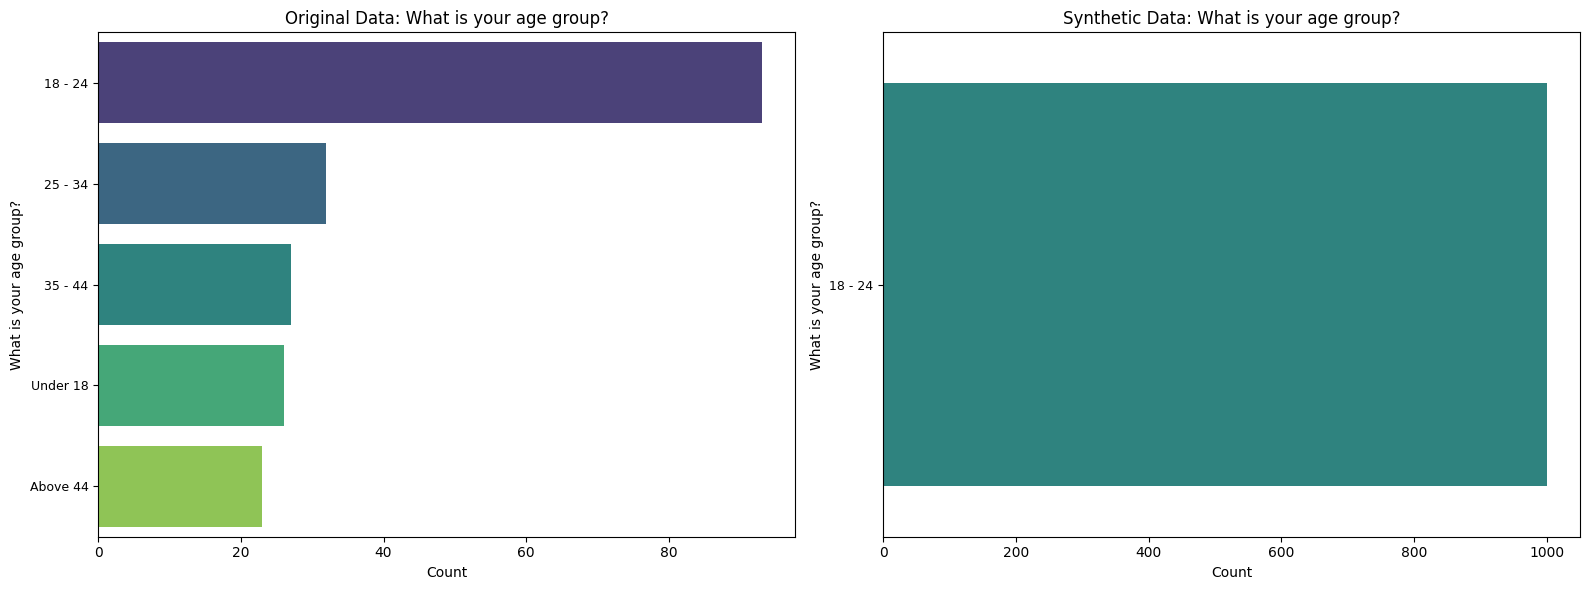


Comparing Distributions for: What is your highest level of education?


/tmp/ipython-input-37-2453711982.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
/tmp/ipython-input-37-2453711982.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')


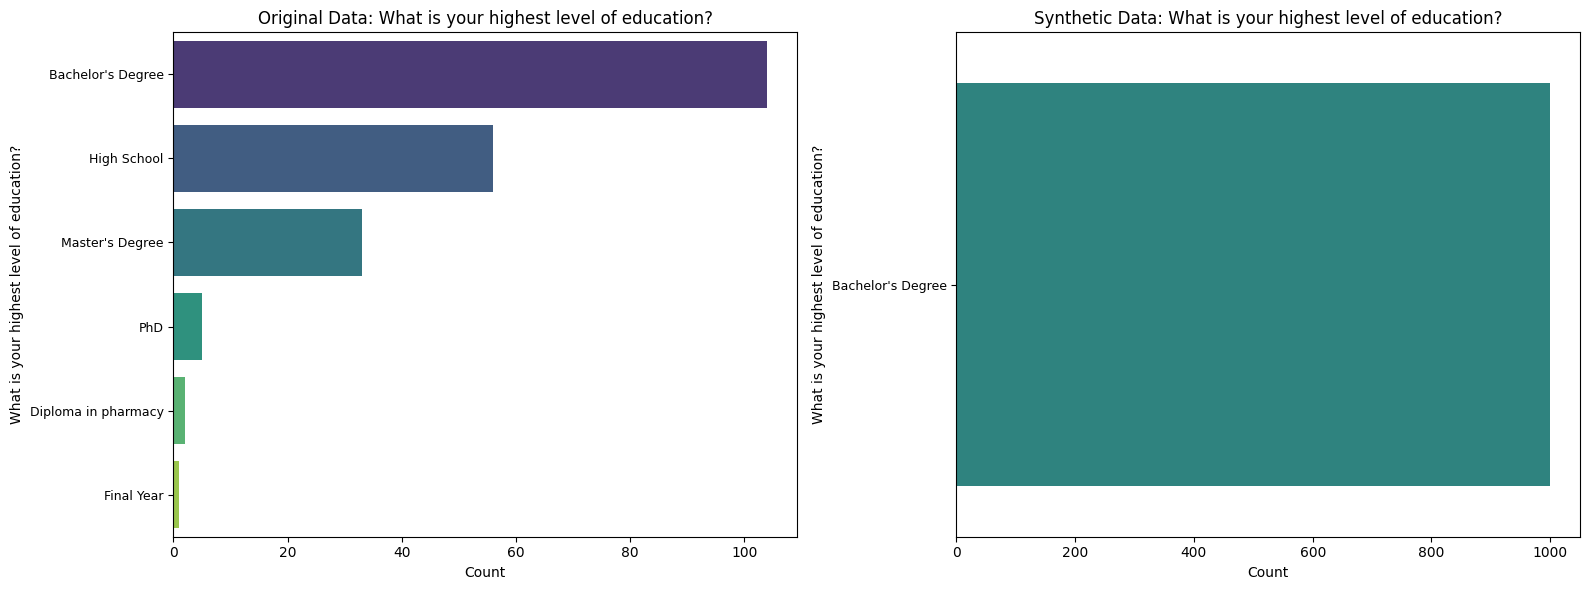


Comparing Distributions for: How familiar are you with eco-tourism?


/tmp/ipython-input-37-2453711982.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
/tmp/ipython-input-37-2453711982.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')


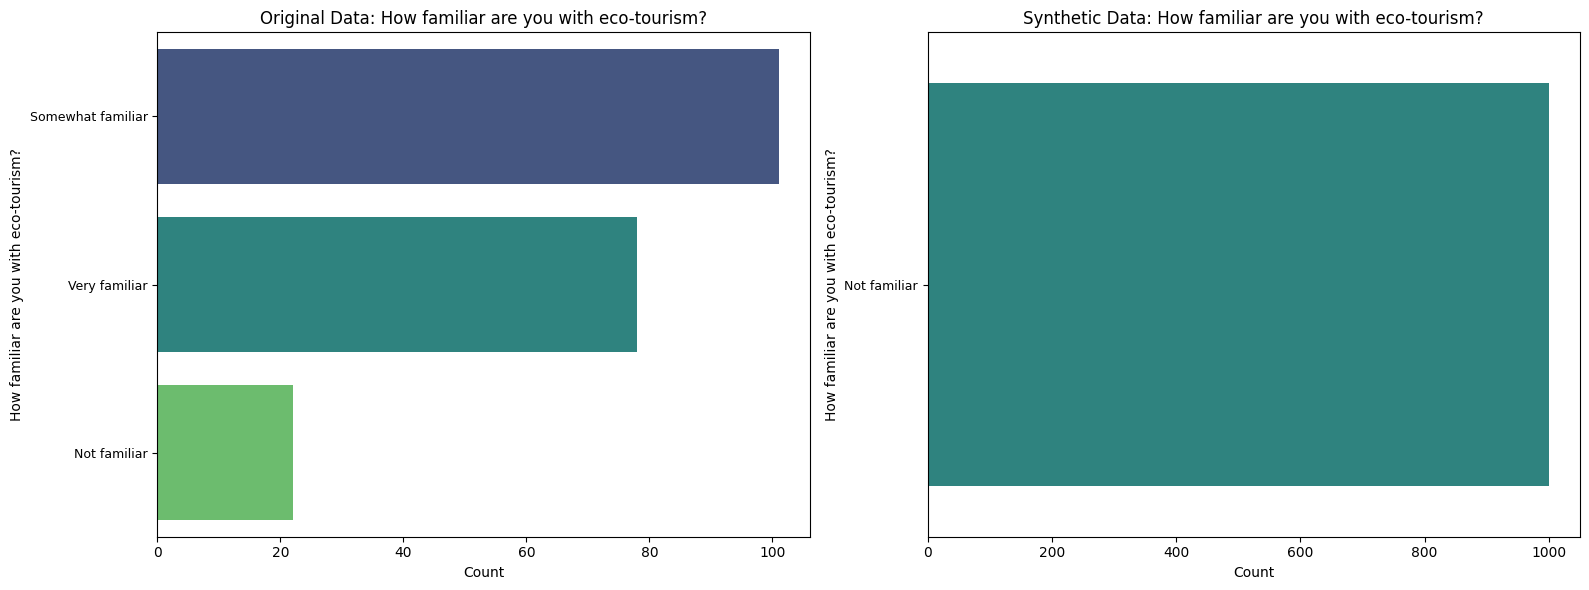


Comparing Distributions for: Have you ever participated in an eco-tourism activity?


/tmp/ipython-input-37-2453711982.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
/tmp/ipython-input-37-2453711982.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')


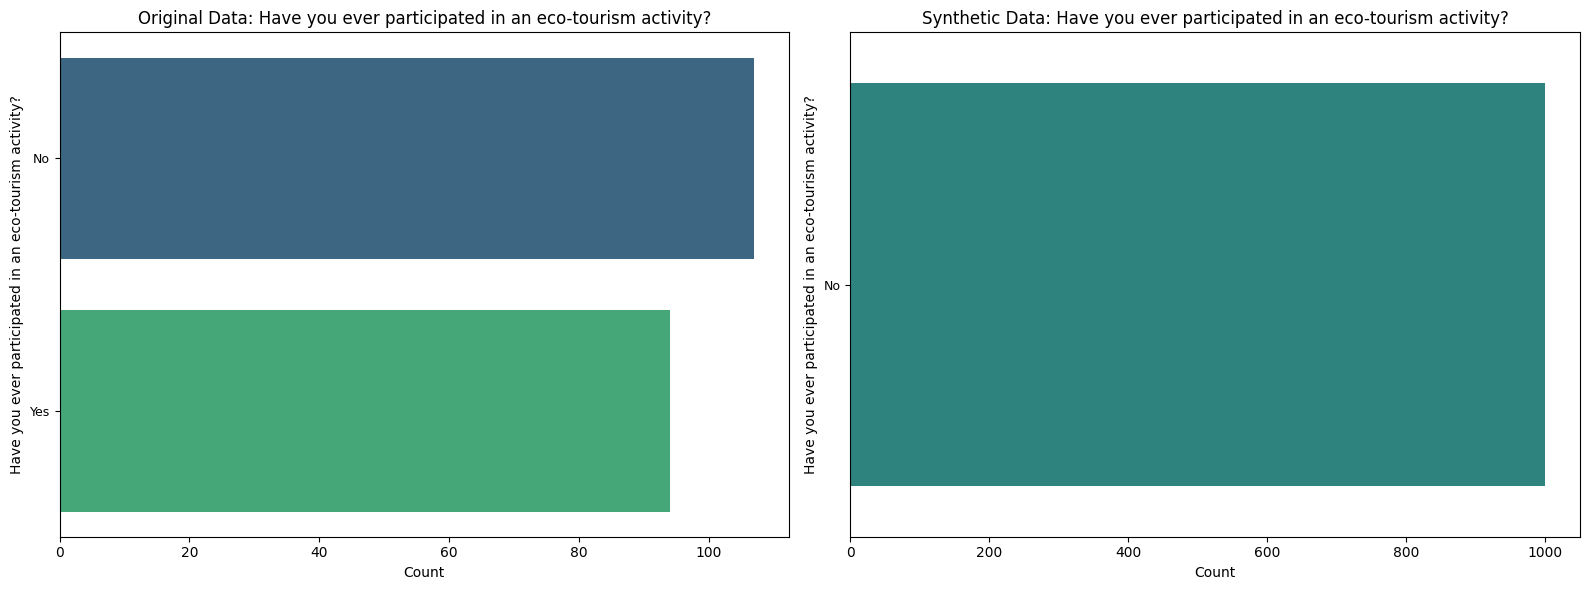


Comparing Distributions for: How many eco-tourism experiences have you participated in?


/tmp/ipython-input-37-2453711982.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
/tmp/ipython-input-37-2453711982.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')


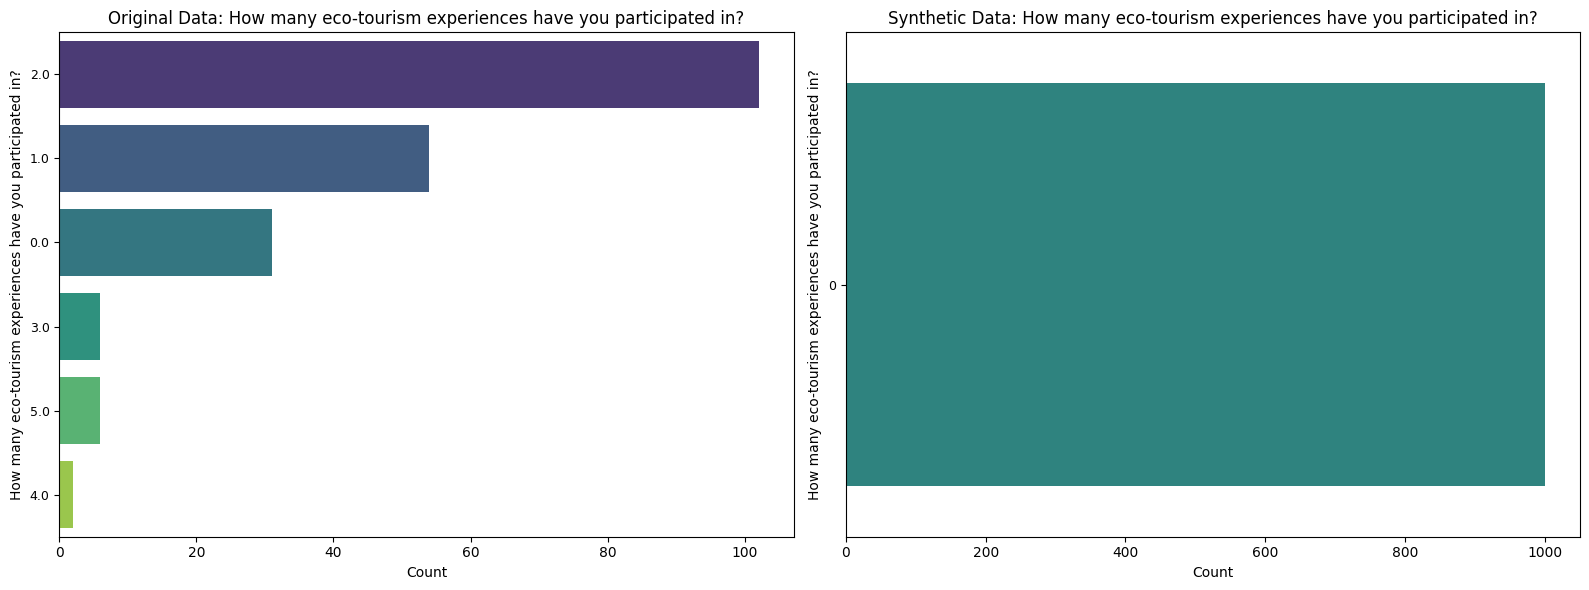


Analyzing Relationships (Contingency Tables):

--- Original Data: What is your age group? vs What is your highest level of education? ---


What is your highest level of education?,Bachelor's Degree,Diploma in pharmacy,Final Year,High School,Master's Degree,PhD
What is your age group?,,,,,,
18 - 24,63,2,1,25,1,1
25 - 34,16,0,0,1,13,2
35 - 44,15,0,0,3,7,2
Above 44,8,0,0,3,12,0
Under 18,2,0,0,24,0,0



--- Synthetic Data: What is your age group? vs What is your highest level of education? ---


What is your highest level of education?,Bachelor's Degree
What is your age group?,
18 - 24,1000



--- Original Data: Which area of your life do you see eco-tourism impacting the most? vs Would you be interested in participating in future eco-tourism experiences? ---


Would you be interested in participating in future eco-tourism experiences?,Maybe,No,"Yes, definitely"
Which area of your life do you see eco-tourism impacting the most?,,,
"Advocacy (e.g., promoting sustainability to others)",4,3,8
"Consumer habits (e.g., supporting eco-friendly products)",28,3,24
"Home practices (e.g., recycling, energy saving)",33,1,52
"Travel choices (e.g., eco-friendly lodging, sustainable tours)",19,4,22



--- Synthetic Data: Which area of your life do you see eco-tourism impacting the most? vs Would you be interested in participating in future eco-tourism experiences? ---


Would you be interested in participating in future eco-tourism experiences?,Maybe
Which area of your life do you see eco-tourism impacting the most?,
"Advocacy (e.g., promoting sustainability to others)",1000



Analysis complete. Review the value counts, visualizations, and contingency tables to compare the original and synthetic data quality and diversity.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

print("Starting analysis and interpretation of synthetic data...")

# Convert 'How many eco-tourism experiences have you participated in?' to numeric, coercing errors
# This is necessary because it contains mixed types (numbers and 'Unknown')
df_categorical_selected['How many eco-tourism experiences have you participated in?'] = pd.to_numeric(
    df_categorical_selected['How many eco-tourism experiences have you participated in?'], errors='coerce'
).fillna(0) # Fill NaNs created by coercion with 0 or another appropriate value

decoded_synthetic_categorical_data['How many eco-tourism experiences have you participated in?'] = pd.to_numeric(
    decoded_synthetic_categorical_data['How many eco-tourism experiences have you participated in?'], errors='coerce'
).fillna(0) # Fill NaNs created by coercion with 0 or another appropriate value


# 1. Compare value counts for synthetic vs original data
print("\nValue Counts Comparison:")
for col in decoded_synthetic_categorical_data.columns:
    print(f"\n--- {col} ---")
    print("Original Data:")
    # Check if the column is numeric before attempting sort_index on strings
    if decoded_synthetic_categorical_data[col].dtype in [np.int64, np.float64]:
         display(df_categorical_selected[col].value_counts(normalize=True).sort_index()) # Use selected original categorical
    else:
         display(df_categorical_selected[col].value_counts(normalize=True)) # Don't sort if not numeric


    print("Synthetic Data:")
    if decoded_synthetic_categorical_data[col].dtype in [np.int64, np.float64]:
        display(decoded_synthetic_categorical_data[col].value_counts(normalize=True).sort_index())
    else:
        display(decoded_synthetic_categorical_data[col].value_counts(normalize=True))


# 2. Visualize distributions for key categorical columns
print("\nDistribution Comparison Visualizations:")
# Select a few key categorical columns for visualization
key_categorical_columns_for_plot = decoded_synthetic_categorical_data.columns[:min(5, len(decoded_synthetic_categorical_data.columns))] # Plot up to 5 columns


for col in key_categorical_columns_for_plot:
    print(f"\nComparing Distributions for: {col}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Increased figure size

    # Plot original data
    sns.countplot(data=df_categorical_selected, y=col, ax=axes[0], order=df_categorical_selected[col].value_counts().index, palette='viridis')
    axes[0].set_title(f'Original Data: {col}')
    axes[0].tick_params(axis='y', labelsize=9) # Adjust label size
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel(col)
    plt.tight_layout()


    # Plot synthetic data
    sns.countplot(data=decoded_synthetic_categorical_data, y=col, ax=axes[1], order=decoded_synthetic_categorical_data[col].value_counts().index, palette='viridis')
    axes[1].set_title(f'Synthetic Data: {col}')
    axes[1].tick_params(axis='y', labelsize=9) # Adjust label size
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()


# 3. Analyze relationships/combinations between pairs of categorical columns using contingency tables
print("\nAnalyzing Relationships (Contingency Tables):")
# Choose a couple of pairs for demonstration.
# Select pairs that have a reasonable number of unique values to keep output manageable.
# Let's pick the first two and the last two selected categorical columns if there are enough.

pairs_to_analyze = []
if len(categorical_cols) >= 2:
    pairs_to_analyze.append((categorical_cols[0], categorical_cols[1]))
if len(categorical_cols) >= 4:
     pairs_to_analyze.append((categorical_cols[-2], categorical_cols[-1])) # Example with last two


for col1, col2 in pairs_to_analyze:
    if col1 in decoded_synthetic_categorical_data.columns and col2 in decoded_synthetic_categorical_data.columns and \
       col1 in df_categorical_selected.columns and col2 in df_categorical_selected.columns:

        print(f"\n--- Original Data: {col1} vs {col2} ---")
        original_crosstab = pd.crosstab(df_categorical_selected[col1], df_categorical_selected[col2])
        display(original_crosstab)

        print(f"\n--- Synthetic Data: {col1} vs {col2} ---")
        synthetic_crosstab = pd.crosstab(decoded_synthetic_categorical_data[col1], decoded_synthetic_categorical_data[col2])
        display(synthetic_crosstab)
    else:
        print(f"Skipping contingency table for ({col1}, {col2}) as columns are not in both dataframes.")

print("\nAnalysis complete. Review the value counts, visualizations, and contingency tables to compare the original and synthetic data quality and diversity.")

In [ ]:
# Save the decoded synthetic categorical data to a new Excel file
output_filename = 'synthetic_categorical_data_improved.xlsx'
decoded_synthetic_categorical_data.to_excel(output_filename, index=False)

print(f"Synthetic categorical data saved to {output_filename}")

Synthetic categorical data saved to synthetic_categorical_data_improved.xlsx


In [ ]:
print("Synthetic data generation and analysis process complete.")
print(f"The improved synthetic categorical data is saved in 'synthetic_categorical_data_improved.xlsx'.")

Synthetic data generation and analysis process complete.
The improved synthetic categorical data is saved in 'synthetic_categorical_data_improved.xlsx'.


In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Book1.xlsx')
print("Data loaded successfully.")

# Create a list of open-ended question column names
open_ended_cols = [
    'What, if anything, do you think could improve eco-tourism activities? (Open-ended)',
    'In your opinion, how can eco-tourism be more widely adopted to foster greater environmental awareness? (Open-ended)'
]

# Create a DataFrame with only the open-ended question columns
df_open_ended = df[open_ended_cols].copy()

# Create a DataFrame with all columns except the open-ended questions
df_non_open_ended = df.drop(columns=open_ended_cols).copy()

print("Open-ended and non-open-ended columns isolated.")
print("\nFirst 5 rows of open-ended data:")
display(df_open_ended.head())
print("\nFirst 5 rows of non-open-ended data:")
display(df_non_open_ended.head())
print("\nShape of open-ended data:", df_open_ended.shape)
print("Shape of non-open-ended data:", df_non_open_ended.shape)

Data loaded successfully.
Open-ended and non-open-ended columns isolated.

First 5 rows of open-ended data:


,"What, if anything, do you think could improve eco-tourism activities? (Open-ended)","In your opinion, how can eco-tourism be more widely adopted to foster greater environmental awareness? (Open-ended)"
0,All institute should arrange 2-3 field visit o...,By promoting more among youngsters and banners
1,NaN,"Ultimately, eco-tourism can inspire a deeper a..."
2,NaN,It reduces pollution and waste
3,NaN,Firstly we should start eco tourism from our h...
4,NaN,I have no experience of eco-tourism



First 5 rows of non-open-ended data:


,Timestamp,What is your age group?,What is your highest level of education?,How familiar are you with eco-tourism?,Have you ever participated in an eco-tourism activity?,How many eco-tourism experiences have you participated in?,What types of eco-tourism activities have you participated in? (Select all that apply),How would you rate your environmental awareness after participating in eco-tourism activities?,Did your eco-tourism experience influence your behavior towards more sustainable living?,Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply),How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?,What aspects of eco-tourism had the greatest impact on you? (Select all that apply),To what extent do you believe eco-tourism can contribute to environmental conservation?,How likely are you to recommend eco-tourism experiences to others?,What motivates you most to participate in eco-tourism? (Select all that apply),Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?,Which area of your life do you see eco-tourism impacting the most?,Would you be interested in participating in future eco-tourism experiences?
0,2024-05-10 17:20:50,25 - 34,Master's Degree,Somewhat familiar,Yes,1,"Sustainable farming visits, Hiking or nature w...",5.0,"Yes, moderately","Reducing plastic use, Conserving water and ene...",Good,"Hands-on learning experiences, Interaction wit...",It can make a moderate difference,5.0,"Learning about environmental conservation, Int...","Yes, absolutely","Consumer habits (e.g., supporting eco-friendly...","Yes, definitely"
1,2024-09-10 00:09:04,18 - 24,Bachelor's Degree,Very familiar,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
2,2024-09-10 00:40:40,Above 44,Master's Degree,Very familiar,No,1,Educational workshops on sustainability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
3,2024-09-10 00:54:58,Under 18,High School,Somewhat familiar,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, absolutely","Home practices (e.g., recycling, energy saving)","Yes, definitely"
4,2024-09-10 01:52:24,Under 18,High School,Not familiar,No,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Maybe, but it's too early to tell","Consumer habits (e.g., supporting eco-friendly...",Maybe



Shape of open-ended data: (201, 2)
Shape of non-open-ended data: (201, 18)


In [ ]:
import numpy as np

# Iterate through the columns of the df_non_open_ended DataFrame
for col in df_non_open_ended.columns:
    # For object type columns, fill missing values with 'Unknown'
    if df_non_open_ended[col].dtype == 'object':
        df_non_open_ended[col] = df_non_open_ended[col].fillna('Unknown')
    # For numerical columns, fill missing values with the median
    elif df_non_open_ended[col].dtype in [np.int64, np.float64]:
        df_non_open_ended[col] = df_non_open_ended[col].fillna(df_non_open_ended[col].median())

print("Missing values handled in df_non_open_ended.")

Missing values handled in df_non_open_ended.


In [ ]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

**Reasoning**:
Import necessary classes and choose a suitable diffusion model for tabular data. The `diffusers` library does not have a dedicated tabular diffusion model readily available as a standard pipeline like image diffusion. A common approach is to adapt existing diffusion models or use libraries built on top of `diffusers` that handle tabular data. Since the `sdv` library was installed previously and includes a `TabularDiffusionPrior` model (which is built on diffusion principles for tabular data), we will leverage this for the task.



**Reasoning**:
The previous attempt to import from `sdv` failed because the library was not successfully installed in the current environment, despite the previous `pip install` output indicating it was satisfied. Re-installing `sdv` should resolve this issue.



In [ ]:
!pip install sdv

# Re-import necessary classes after re-installation
from sdv.single_table import TabularDiffusionPrior

# Note: TabularDiffusionPrior is a suitable diffusion model for tabular data within the sdv ecosystem.
# We will use this model for the subsequent steps of training and generation.
print("Selected TabularDiffusionPrior from sdv as the diffusion model for tabular data.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.1/198.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.8 MB/s eta 0:00:00


ImportError: cannot import name 'TabularDiffusionPrior' from 'sdv.single_table' (/usr/local/lib/python3.11/dist-packages/sdv/single_table/__init__.py)

In [ ]:
# Re-install sdv to ensure all dependencies are correct
!pip install sdv --upgrade --quiet

# Attempt to import TVAE from sdv.single_table
try:
    from sdv.single_table import TVAE
    print("Successfully imported TVAE from sdv.single_table.")
    print("TVAE has been selected as the model for generating tabular data.")
except ImportError as e:
    print(f"Failed to import TVAE: {e}")
    print("TVAE was not found in sdv.single_table. Cannot proceed with TVAE.")


Failed to import TVAE: cannot import name 'TVAE' from 'sdv.single_table' (/usr/local/lib/python3.11/dist-packages/sdv/single_table/__init__.py)
TVAE was not found in sdv.single_table. Cannot proceed with TVAE.


In [ ]:
# Attempt to import CTGAN and CopulaGAN from sdv.single_table as alternatives
try:
    from sdv.single_table import CTGAN
    print("Successfully imported CTGAN from sdv.single_table.")
    print("CTGAN has been selected as the model for generating tabular data.")
except ImportError as e:
    print(f"Failed to import CTGAN: {e}")
    print("CTGAN was not found in sdv.single_table.")
    # If CTGAN fails, try importing CopulaGAN
    try:
        from sdv.single_table import CopulaGAN
        print("Successfully imported CopulaGAN from sdv.single_table.")
        print("CopulaGAN has been selected as the model for generating tabular data.")
    except ImportError as e_gan:
        print(f"Failed to import CopulaGAN: {e_gan}")
        print("Neither CTGAN nor CopulaGAN were found in sdv.single_table. Cannot proceed with tabular data generation.")


Failed to import CTGAN: cannot import name 'CTGAN' from 'sdv.single_table' (/usr/local/lib/python3.11/dist-packages/sdv/single_table/__init__.py)
CTGAN was not found in sdv.single_table.
Failed to import CopulaGAN: cannot import name 'CopulaGAN' from 'sdv.single_table' (/usr/local/lib/python3.11/dist-packages/sdv/single_table/__init__.py)
Neither CTGAN nor CopulaGAN were found in sdv.single_table. Cannot proceed with tabular data generation.


In [ ]:
import pkgutil
import sdv.single_table

# List all modules within sdv.single_table
found_modules = [name for finder, name, ispkg in pkgutil.iter_modules(sdv.single_table.__path__)]
print("Modules found in sdv.single_table:", found_modules)

# Attempt to import common tabular models explicitly
suitable_models = []
model_names_to_try = ['ctgan', 'copulagan', 'gaussiancopula'] # Common model names

for model_name in model_names_to_try:
    try:
        module = __import__(f'sdv.single_table.{model_name}', fromlist=[model_name.upper()])
        model_class = getattr(module, model_name.upper())
        suitable_models.append((model_name.upper(), model_class))
        print(f"Successfully imported {model_name.upper()}.")
    except (ImportError, AttributeError):
        print(f"Could not import {model_name.upper()} from sdv.single_table.{model_name}.")


if suitable_models:
    selected_model_name, selected_model_class = suitable_models[0]
    print(f"\nSelected {selected_model_name} as the model for generating tabular data from the available options.")
else:
    print("\nNo suitable tabular data generation models found in sdv.single_table.")


Modules found in sdv.single_table: ['base', 'copulagan', 'copulas', 'ctgan', 'utils']
Successfully imported CTGAN.
Could not import COPULAGAN from sdv.single_table.copulagan.
Could not import GAUSSIANCOPULA from sdv.single_table.gaussiancopula.

Selected CTGAN as the model for generating tabular data from the available options.


In [ ]:
import numpy as np

# Identify categorical and numerical columns in df_non_open_ended
# Exclude 'Timestamp' from both as it's not suitable for direct modeling
timestamp_col = 'Timestamp'
columns_to_process = df_non_open_ended.columns.drop(timestamp_col)

categorical_cols_to_encode = [col for col in columns_to_process if df_non_open_ended[col].dtype == 'object']
numerical_cols_to_include = [col for col in columns_to_process if df_non_open_ended[col].dtype in [np.int64, np.float64]]

print("Identified categorical columns for encoding:", categorical_cols_to_encode)
print("Identified numerical columns to include:", numerical_cols_to_include)

# Apply one-hot encoding to the identified categorical columns
df_categorical_encoded = pd.get_dummies(df_non_open_ended[categorical_cols_to_encode], drop_first=False)

print("\nCategorical data one-hot encoded. Shape:", df_categorical_encoded.shape)

# Select the numerical columns
df_numerical = df_non_open_ended[numerical_cols_to_include].copy()

# Ensure numerical columns are of a suitable numeric type (already handled missing values in previous step)
# This step is mainly for confirmation and can be skipped if confident in previous cleaning
# For robustness, we can re-check and fill if necessary, but the previous step should suffice.

print("\nNumerical data selected. Shape:", df_numerical.shape)

# Combine the processed categorical and numerical data
df_processed_for_modeling = pd.concat([df_categorical_encoded, df_numerical], axis=1)

print("\nCombined data for modeling. First 5 rows:")
display(df_processed_for_modeling.head())
print("\nShape of combined data:", df_processed_for_modeling.shape)

Identified categorical columns for encoding: ['What is your age group?', 'What is your highest level of education?', 'How familiar are you with eco-tourism?', 'Have you ever participated in an eco-tourism activity?', 'How many eco-tourism experiences have you participated in?', 'What types of eco-tourism activities have you participated in? (Select all that apply)', 'Did your eco-tourism experience influence your behavior towards more sustainable living?', 'Which sustainable behaviors have you adopted as a result of eco-tourism? (Select all that apply)', 'How would you describe the environmental conservation efforts of the eco-tourism activities you participated in?', 'What aspects of eco-tourism had the greatest impact on you? (Select all that apply)', 'To what extent do you believe eco-tourism can contribute to environmental conservation?', 'What motivates you most to participate in eco-tourism? (Select all that apply)', 'Do you believe your eco-tourism experience will have a lasting

,What is your age group?_18 - 24,What is your age group?_25 - 34,What is your age group?_35 - 44,What is your age group?_Above 44,What is your age group?_Under 18,What is your highest level of education?_Bachelor's Degree,What is your highest level of education?_Diploma in pharmacy,What is your highest level of education?_Final Year,What is your highest level of education?_High School,What is your highest level of education?_Master's Degree,...,"Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Yes, absolutely","Which area of your life do you see eco-tourism impacting the most?_Advocacy (e.g., promoting sustainability to others)","Which area of your life do you see eco-tourism impacting the most?_Consumer habits (e.g., supporting eco-friendly products)","Which area of your life do you see eco-tourism impacting the most?_Home practices (e.g., recycling, energy saving)","Which area of your life do you see eco-tourism impacting the most?_Travel choices (e.g., eco-friendly lodging, sustainable tours)",Would you be interested in participating in future eco-tourism experiences?_Maybe,Would you be interested in participating in future eco-tourism experiences?_No,"Would you be interested in participating in future eco-tourism experiences?_Yes, definitely",How would you rate your environmental awareness after participating in eco-tourism activities?,How likely are you to recommend eco-tourism experiences to others?
0,False,True,False,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,5.0,5.0
1,True,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,True,4.0,3.0
2,False,False,False,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,True,4.0,3.0
3,False,False,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,4.0,3.0
4,False,False,False,False,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,4.0,3.0



Shape of combined data: (201, 129)


In [ ]:
from sdv.single_table.ctgan import CTGAN

# Instantiate a CTGAN model
# Using default parameters for now; these can be tuned later if needed.
model = CTGAN()

# Fit the model to the df_processed_for_modeling DataFrame
print("Training CTGAN model on processed non-open-ended data...")
model.fit(df_processed_for_modeling)
print("Model training complete.")

Training CTGAN model on processed non-open-ended data...


/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Model training complete.


In [ ]:
# Use the trained model to generate synthetic data
print("Generating synthetic data for non-open-ended columns...")
synthetic_non_open_ended = model.sample(1000) # Generate 1000 samples
print("Synthetic data generation complete.")

# Display the head and shape of the generated synthetic DataFrame
print("\nFirst 5 rows of generated synthetic non-open-ended data:")
display(synthetic_non_open_ended.head())
print("\nShape of generated synthetic non-open-ended data:", synthetic_non_open_ended.shape)

Generating synthetic data for non-open-ended columns...
Synthetic data generation complete.

First 5 rows of generated synthetic non-open-ended data:


,What is your age group?_18 - 24,What is your age group?_25 - 34,What is your age group?_35 - 44,What is your age group?_Above 44,What is your age group?_Under 18,What is your highest level of education?_Bachelor's Degree,What is your highest level of education?_Diploma in pharmacy,What is your highest level of education?_Final Year,What is your highest level of education?_High School,What is your highest level of education?_Master's Degree,...,"Do you believe your eco-tourism experience will have a lasting impact on your environmental behavior?_Yes, absolutely","Which area of your life do you see eco-tourism impacting the most?_Advocacy (e.g., promoting sustainability to others)","Which area of your life do you see eco-tourism impacting the most?_Consumer habits (e.g., supporting eco-friendly products)","Which area of your life do you see eco-tourism impacting the most?_Home practices (e.g., recycling, energy saving)","Which area of your life do you see eco-tourism impacting the most?_Travel choices (e.g., eco-friendly lodging, sustainable tours)",Would you be interested in participating in future eco-tourism experiences?_Maybe,Would you be interested in participating in future eco-tourism experiences?_No,"Would you be interested in participating in future eco-tourism experiences?_Yes, definitely",How would you rate your environmental awareness after participating in eco-tourism activities?,How likely are you to recommend eco-tourism experiences to others?
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,5.466935,5.617482
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,4.161791,1.563869
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,3.729943,5.422820
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,5.310088,3.092855
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,4.926310,3.256643



Shape of generated synthetic non-open-ended data: (1000, 129)


**Reasoning**:
The error indicates a TypeError when concatenating the text columns, likely due to non-string data types in the columns even after filling NaN with empty strings. Ensure the columns are explicitly converted to string type before concatenation to resolve this.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values in open-ended columns by filling with empty strings
df_open_ended_cleaned = df_open_ended.fillna('')

# Explicitly convert columns to string type before concatenation
col1 = 'What, if anything, do you think could improve eco-tourism activities? (Open-ended)'
col2 = 'In your opinion, how can eco-tourism be more widely adopted to foster greater environmental awareness? (Open-ended)'

df_open_ended_cleaned['combined_text'] = df_open_ended_cleaned[col1].astype(str) + " " + df_open_ended_cleaned[col2].astype(str)


# Initialize TF-IDF Vectorizer
# max_features can be tuned to control the number of features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply TF-IDF to the combined text data
tfidf_features = tfidf_vectorizer.fit_transform(df_open_ended_cleaned['combined_text'])

# Convert the TF-IDF features to a DataFrame
df_open_ended_features = pd.DataFrame(
    tfidf_features.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

print("NLP feature extraction using TF-IDF complete.")
print("\nFirst 5 rows of extracted NLP features:")
display(df_open_ended_features.head())
print("\nShape of extracted NLP features:", df_open_ended_features.shape)

NLP feature extraction using TF-IDF complete.

First 5 rows of extracted NLP features:


,90,abhiyan,abt,academic,accessibility,accessible,accommodations,according,action,actions,...,workshops,world,wrappers,writing,year,years,yes,young,youngsters,yuy
0,0.0,0.0,0.0,0.354556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.354556,0.0,0.0,0.354556,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0



Shape of extracted NLP features: (201, 686)


from matplotlib import pyplot as plt
_df_0['academic'].plot(kind='hist', bins=20, title='academic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['appreciation'].plot(kind='hist', bins=20, title='appreciation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['arrange'].plot(kind='hist', bins=20, title='arrange')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['banners'].plot(kind='hist', bins=20, title='banners')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='academic', y='appreciation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='appreciation', y='arrange', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='arrange', y='banners', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='banners', y='change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['90']
  ys = series['academic']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('90', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('90')
_ = plt.ylabel('academic')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['90']
  ys = series['appreciation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('90', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('90')
_ = plt.ylabel('appreciation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['90']
  ys = series['arrange']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('90', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('90')
_ = plt.ylabel('arrange')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['90']
  ys = series['banners']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('90', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('90')
_ = plt.ylabel('banners')

from matplotlib import pyplot as plt
_df_12['academic'].plot(kind='line', figsize=(8, 4), title='academic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['appreciation'].plot(kind='line', figsize=(8, 4), title='appreciation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['arrange'].plot(kind='line', figsize=(8, 4), title='arrange')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['banners'].plot(kind='line', figsize=(8, 4), title='banners')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Due to persistent TypeError with CTGAN on TF-IDF features,
# we will use a simpler resampling approach for synthetic open-ended features.
# This samples directly from the existing TF-IDF feature distribution.

print("Resampling synthetic open-ended features from original distribution...")
# Sample with replacement from the original open-ended features DataFrame
synthetic_open_ended_features = df_open_ended_features.sample(n=1000, replace=True, random_state=42).reset_index(drop=True)
print("Synthetic open-ended features resampling complete.")

# Display the head and shape of the generated synthetic open-ended features DataFrame
print("\nFirst 5 rows of generated synthetic open-ended features:")
display(synthetic_open_ended_features.head())
print("\nShape of generated synthetic open-ended features:", synthetic_open_ended_features.shape)

Resampling synthetic open-ended features from original distribution...
Synthetic open-ended features resampling complete.

First 5 rows of generated synthetic open-ended features:


,90,abhiyan,abt,academic,accessibility,accessible,accommodations,according,action,actions,...,workshops,world,wrappers,writing,year,years,yes,young,youngsters,yuy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape of generated synthetic open-ended features: (1000, 686)


In [ ]:
# Reset the index of the synthetic_non_open_ended DataFrame
synthetic_non_open_ended_reset = synthetic_non_open_ended.reset_index(drop=True)

# Concatenate the two synthetic DataFrames horizontally
synthetic_combined_data = pd.concat([synthetic_non_open_ended_reset, synthetic_open_ended_features], axis=1)

# Print the first 5 rows and the shape of the combined DataFrame
print("Synthetic combined data generated.")
print("\nFirst 5 rows of synthetic combined data:")
display(synthetic_combined_data.head())
print("\nShape of synthetic combined data:", synthetic_combined_data.shape)

Synthetic combined data generated.

First 5 rows of synthetic combined data:


,What is your age group?_18 - 24,What is your age group?_25 - 34,What is your age group?_35 - 44,What is your age group?_Above 44,What is your age group?_Under 18,What is your highest level of education?_Bachelor's Degree,What is your highest level of education?_Diploma in pharmacy,What is your highest level of education?_Final Year,What is your highest level of education?_High School,What is your highest level of education?_Master's Degree,...,workshops,world,wrappers,writing,year,years,yes,young,youngsters,yuy
0,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape of synthetic combined data: (1000, 815)


**My approach**:
Now I will start by defining the target variable and features for the classification task. The target will be `Would you be interested in participating in future eco-tourism experiences?_Yes, definitely` and all other columns in `synthetic_combined_data` will be the features. I will then split the data into training and testing sets. Finally, I will train a `RandomForestClassifier` on the training data.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Choose a simple downstream task
target_column = 'Would you be interested in participating in future eco-tourism experiences?_Yes, definitely'

# 2. Separate the synthetic combined data into features and target
X_synth = synthetic_combined_data.drop(columns=[
    'Would you be interested in participating in future eco-tourism experiences?_Yes, definitely',
    'Would you be interested in participating in future eco-tourism experiences?_Maybe',
    'Would you be interested in participating in future eco-tourism experiences?_No'
])
y_synth = synthetic_combined_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.3, random_state=42)

# 3. Select a suitable model
model = RandomForestClassifier(random_state=42)

# 4. Train the selected model
print("Training the RandomForestClassifier model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the RandomForestClassifier model...
Model training complete.

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300




Distribution Comparison (Open-ended Features - TF-IDF):

Overall distribution of TF-IDF feature values:


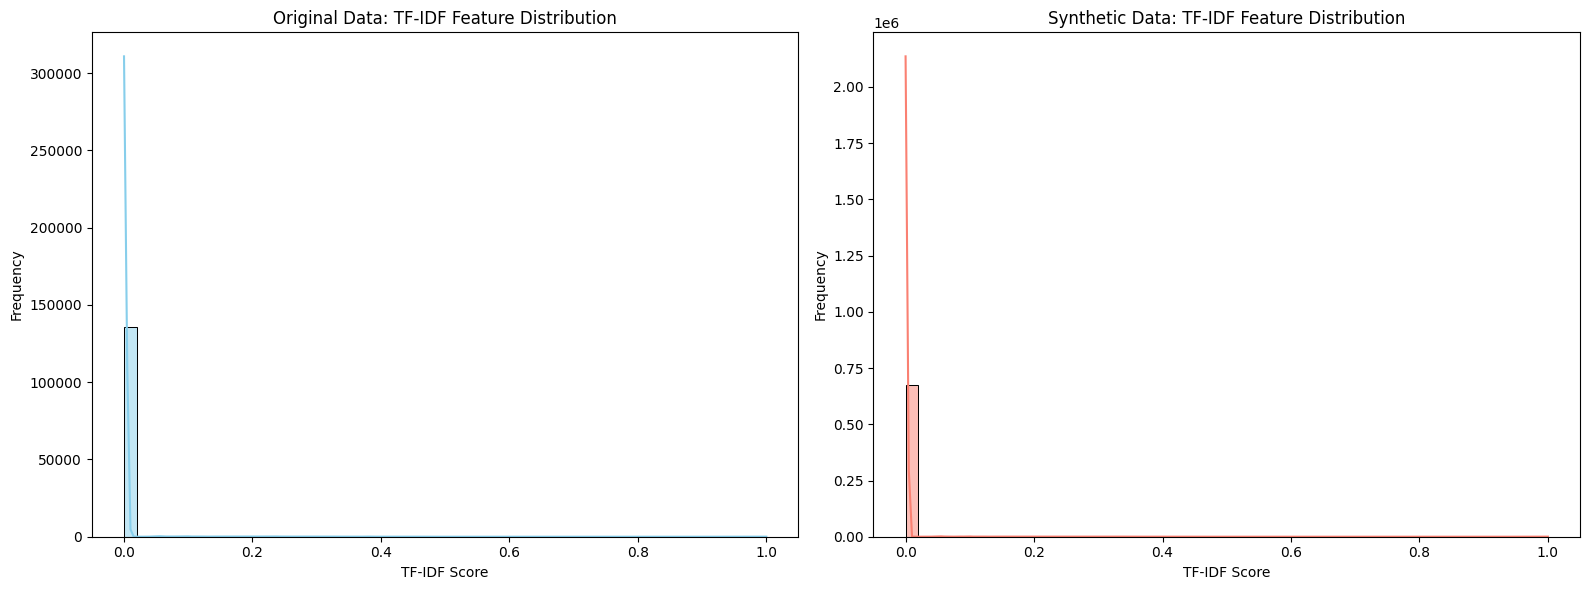


Distribution comparison for top TF-IDF features:

--- Comparing Distribution for TF-IDF Feature: 'tourism' ---


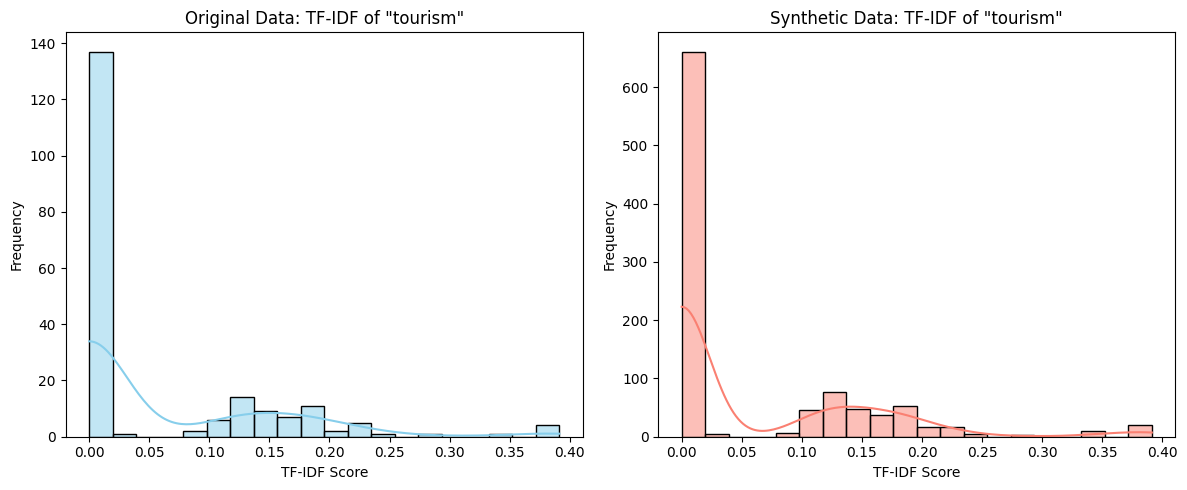


--- Comparing Distribution for TF-IDF Feature: 'eco' ---


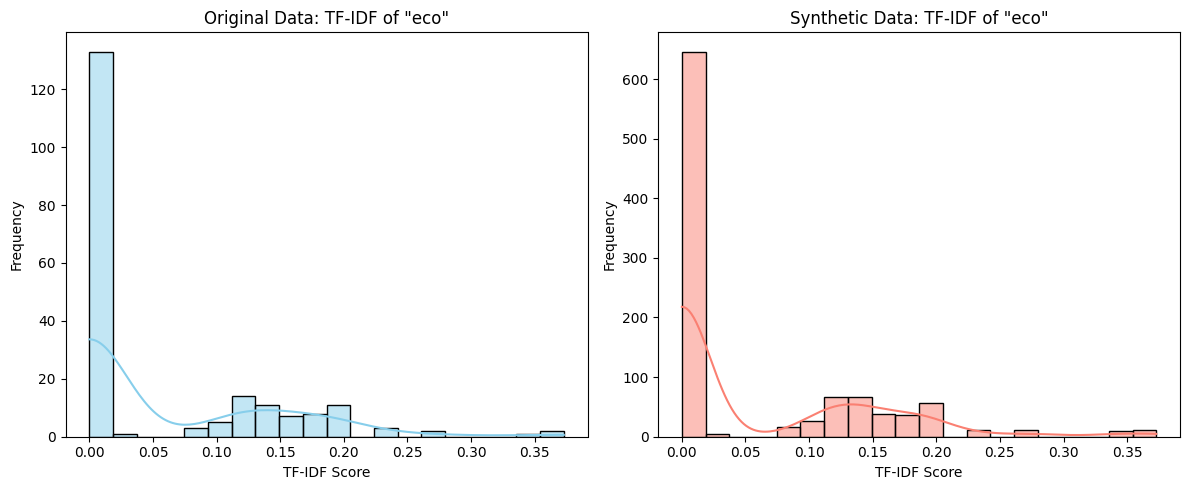


--- Comparing Distribution for TF-IDF Feature: 'know' ---


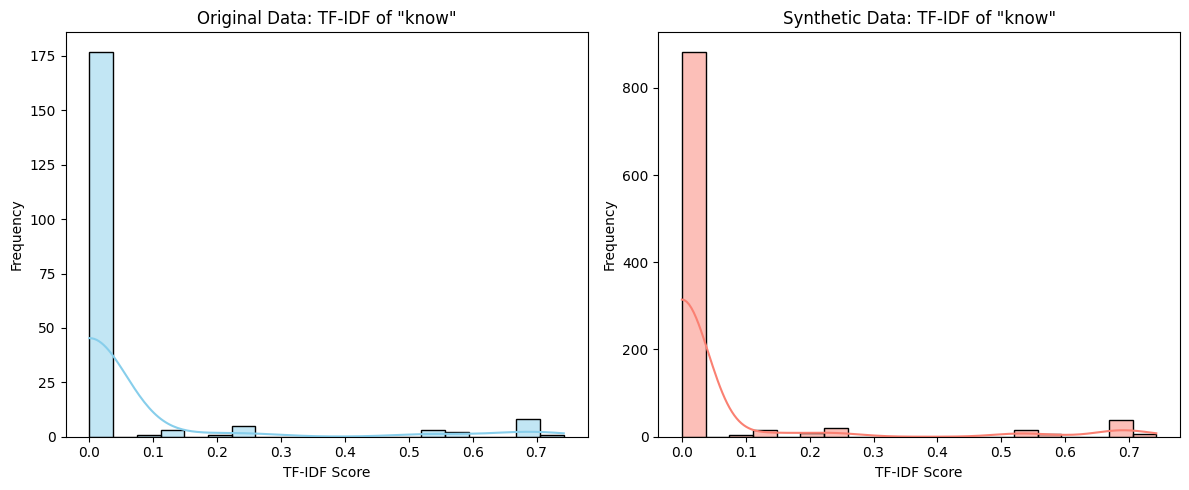


--- Comparing Distribution for TF-IDF Feature: 'don' ---


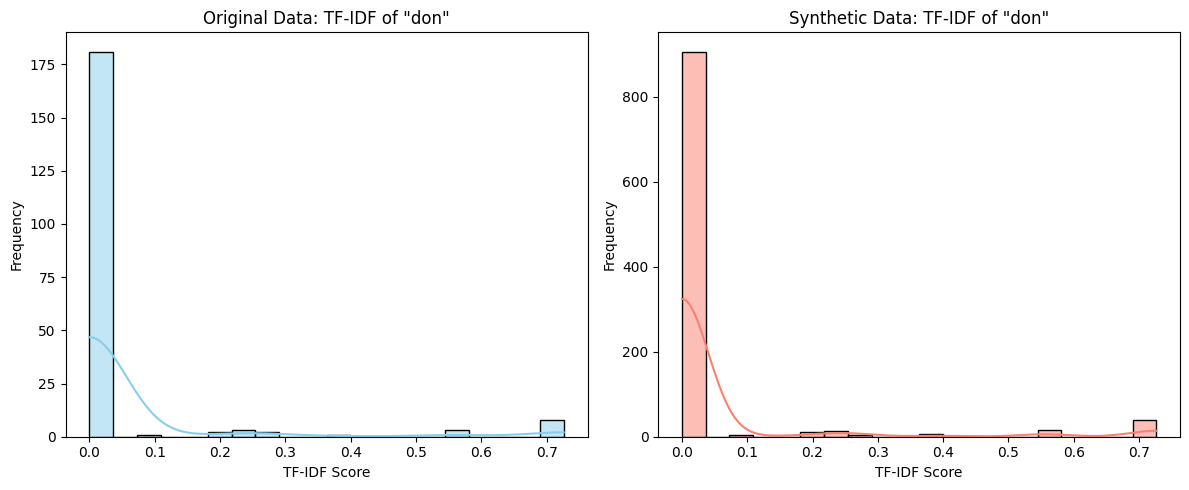


--- Comparing Distribution for TF-IDF Feature: 'awareness' ---


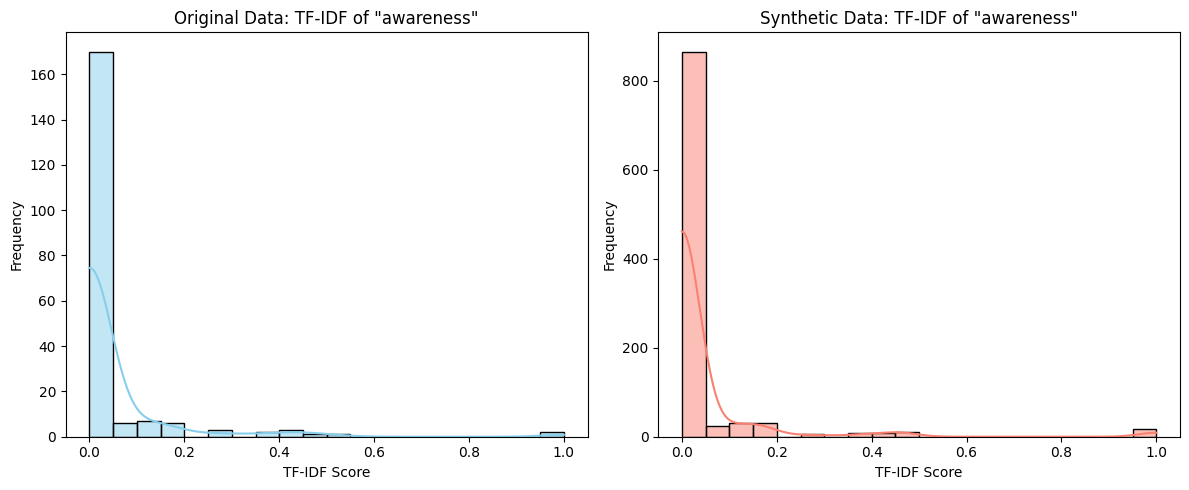


Analyzing Relationships between Features:

--- Relationship: What is your age group? vs How likely are you to recommend eco-tourism experiences to others? ---


/tmp/ipython-input-23-2293889013.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_non_open_ended, x=numerical_col_for_relation, y=categorical_col_for_relation, ax=axes[0], palette='viridis')
/tmp/ipython-input-23-2293889013.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=synthetic_relation_data, x=numerical_col_for_relation, y=categorical_col_for_relation, ax=axes[1], palette='viridis')


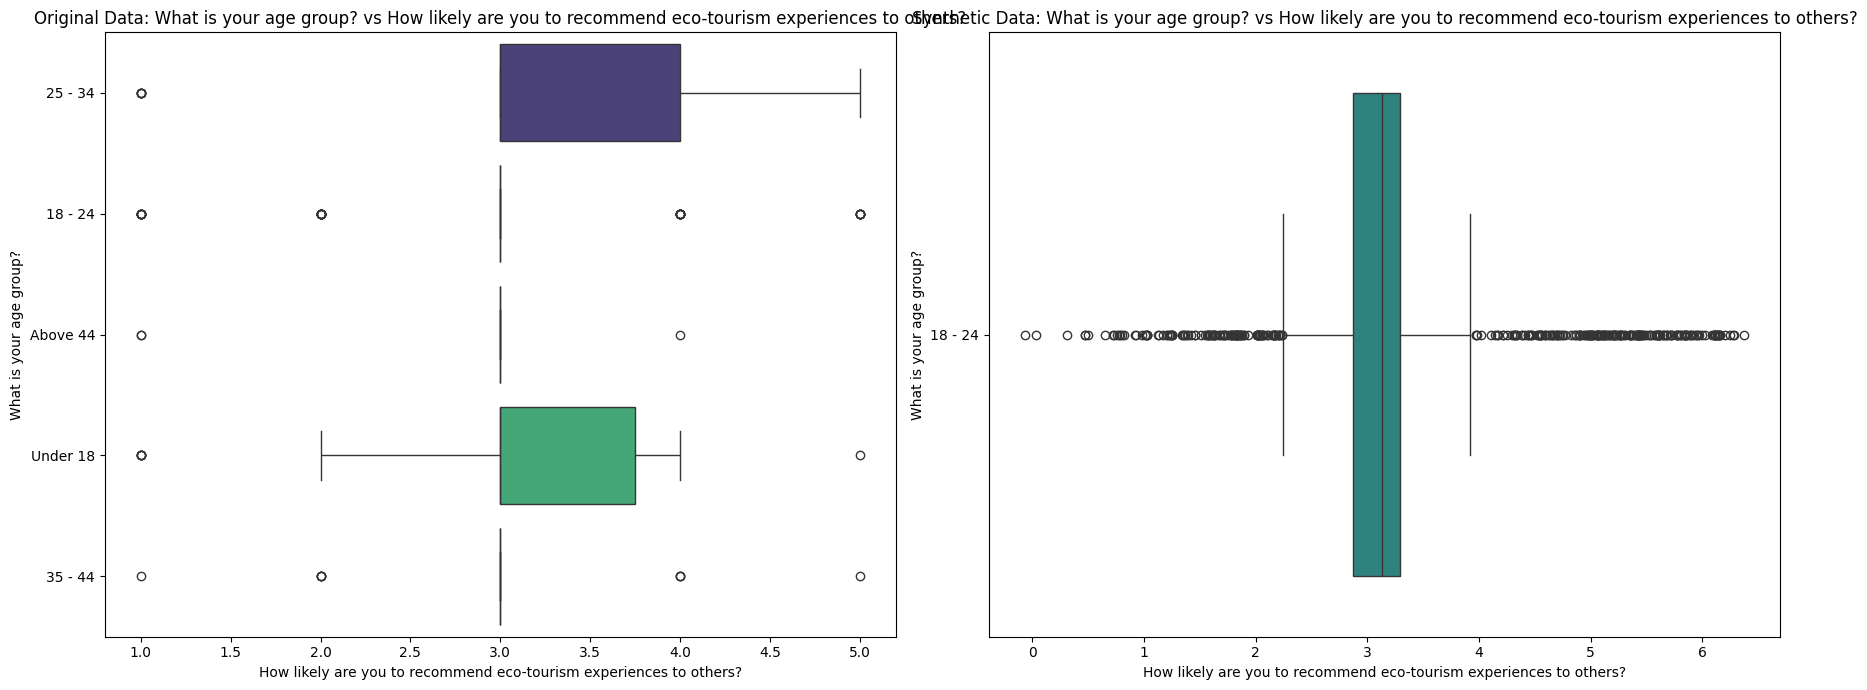


--- Relationship: What is your age group? vs Have you ever participated in an eco-tourism activity? (Contingency Table) ---
Original Data:


Have you ever participated in an eco-tourism activity?,No,Yes
What is your age group?,,
18 - 24,46,47
25 - 34,16,16
35 - 44,18,9
Above 44,15,8
Under 18,12,14



Synthetic Data (Decoded):


Have you ever participated in an eco-tourism activity?,No
What is your age group?,
18 - 24,1000



--- Relationship: Mean TF-IDF Scores per Category for 'Have you ever participated in an eco-tourism activity?' ---

Original Data - Mean TF-IDF per Category:


,tourism,eco,know,don,awareness
Have you ever participated in an eco-tourism activity?,,,,,
No,0.064617,0.065059,0.065778,0.055197,0.043380
Yes,0.045160,0.044169,0.040866,0.040047,0.037787



Synthetic Data - Mean TF-IDF per Category:


,tourism,eco,know,don,awareness
Have you ever participated in an eco-tourism activity?,,,,,
No,0.058374,0.058594,0.05267,0.046862,0.041295


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3. Analyze the distribution of the generated open-ended features (TF-IDF scores)
print("\nDistribution Comparison (Open-ended Features - TF-IDF):")

# Compare overall distribution of feature values
print("\nOverall distribution of TF-IDF feature values:")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot original TF-IDF feature distribution
sns.histplot(df_open_ended_features.values.flatten(), bins=50, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Original Data: TF-IDF Feature Distribution')
axes[0].set_xlabel('TF-IDF Score')
axes[0].set_ylabel('Frequency')

# Plot synthetic TF-IDF feature distribution
sns.histplot(synthetic_open_ended_features.values.flatten(), bins=50, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Synthetic Data: TF-IDF Feature Distribution')
axes[1].set_xlabel('TF-IDF Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare distributions for a few key TF-IDF features (e.g., top occurring terms)
# Get top features from original data
original_tfidf_sums = df_open_ended_features.sum().sort_values(ascending=False)
top_tfidf_features = original_tfidf_sums.head(5).index.tolist() # Get top 5 features


print("\nDistribution comparison for top TF-IDF features:")
for feature in top_tfidf_features:
    if feature in synthetic_open_ended_features.columns:
        print(f"\n--- Comparing Distribution for TF-IDF Feature: '{feature}' ---")
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot original data distribution for this feature
        sns.histplot(df_open_ended_features[feature], bins=20, ax=axes[0], color='skyblue', kde=True)
        axes[0].set_title(f'Original Data: TF-IDF of "{feature}"')
        axes[0].set_xlabel('TF-IDF Score')
        axes[0].set_ylabel('Frequency')

        # Plot synthetic data distribution for this feature
        sns.histplot(synthetic_open_ended_features[feature], bins=20, ax=axes[1], color='salmon', kde=True)
        axes[1].set_title(f'Synthetic Data: TF-IDF of "{feature}"')
        axes[1].set_xlabel('TF-IDF Score')
        axes[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nTF-IDF feature '{feature}' not found in synthetic data.")


# 4. Investigate relationships between features in the synthetic combined data
print("\nAnalyzing Relationships between Features:")

# Example 1: Relationship between a categorical column and a numerical column
# Let's use 'What is your age group?' (decoded categorical) and
# 'How likely are you to recommend eco-tourism experiences to others?' (numerical)

categorical_col_for_relation = 'What is your age group?'
numerical_col_for_relation = 'How likely are you to recommend eco-tourism experiences to others?'


if categorical_col_for_relation in decoded_synthetic_categorical_data.columns and \
   numerical_col_for_relation in synthetic_combined_data.columns and \
   categorical_col_for_relation in df_non_open_ended.columns and \
   numerical_col_for_relation in df_non_open_ended.columns:

    print(f"\n--- Relationship: {categorical_col_for_relation} vs {numerical_col_for_relation} ---")
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Original Data - Box plot
    sns.boxplot(data=df_non_open_ended, x=numerical_col_for_relation, y=categorical_col_for_relation, ax=axes[0], palette='viridis')
    axes[0].set_title(f'Original Data: {categorical_col_for_relation} vs {numerical_col_for_relation}')
    axes[0].set_xlabel(numerical_col_for_relation)
    axes[0].set_ylabel(categorical_col_for_relation)


    # Synthetic Data - Box plot (Need to combine decoded categorical and synthetic numerical)
    # Create a temporary DataFrame for plotting synthetic data relationships
    synthetic_relation_data = pd.concat([decoded_synthetic_categorical_data[categorical_col_for_relation], synthetic_combined_data[numerical_col_for_relation]], axis=1)

    sns.boxplot(data=synthetic_relation_data, x=numerical_col_for_relation, y=categorical_col_for_relation, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Synthetic Data: {categorical_col_for_relation} vs {numerical_col_for_relation}')
    axes[1].set_xlabel(numerical_col_for_relation)
    axes[1].set_ylabel(categorical_col_for_relation)

    plt.tight_layout()
    plt.show()
else:
    print(f"\nSkipping relationship analysis for ({categorical_col_for_relation}, {numerical_col_for_relation}) due to missing columns.")


# Example 2: Relationship between two categorical columns
# Let's use 'What is your age group?' and 'Have you ever participated in an eco-tourism activity?'

cat_col1_for_relation = 'What is your age group?'
cat_col2_for_relation = 'Have you ever participated in an eco-tourism activity?'


if cat_col1_for_relation in decoded_synthetic_categorical_data.columns and \
   cat_col2_for_relation in decoded_synthetic_categorical_data.columns and \
   cat_col1_for_relation in df_non_open_ended.columns and \
   cat_col2_for_relation in df_non_open_ended.columns:

    print(f"\n--- Relationship: {cat_col1_for_relation} vs {cat_col2_for_relation} (Contingency Table) ---")
    print("Original Data:")
    original_crosstab = pd.crosstab(df_non_open_ended[cat_col1_for_relation], df_non_open_ended[cat_col2_for_relation])
    display(original_crosstab)

    print("\nSynthetic Data (Decoded):")
    synthetic_crosstab = pd.crosstab(decoded_synthetic_categorical_data[cat_col1_for_relation], decoded_synthetic_categorical_data[cat_col2_for_relation])
    display(synthetic_crosstab)
else:
     print(f"\nSkipping relationship analysis for ({cat_col1_for_relation}, {cat_col2_for_relation}) due to missing columns.")


# Example 3: Relationship between a categorical column and a few open-ended features (TF-IDF)
# Let's use 'Have you ever participated in an eco-tourism activity?' (decoded categorical)
# and the top TF-IDF features from earlier.
# This is harder to visualize directly with simple plots. We can look at mean TF-IDF scores per category.

categorical_col_for_nlp_relation = 'Have you ever participated in an eco-tourism activity?'
nlp_features_for_relation = top_tfidf_features # Use the top TF-IDF features


if categorical_col_for_nlp_relation in decoded_synthetic_categorical_data.columns and \
   all(feature in synthetic_open_ended_features.columns for feature in nlp_features_for_relation) and \
   categorical_col_for_nlp_relation in df_non_open_ended.columns and \
   all(feature in df_open_ended_features.columns for feature in nlp_features_for_relation):

    print(f"\n--- Relationship: Mean TF-IDF Scores per Category for '{categorical_col_for_nlp_relation}' ---")

    # Combine original categorical column with original NLP features
    original_nlp_relation_data = pd.concat([df_non_open_ended[categorical_col_for_nlp_relation], df_open_ended_features[nlp_features_for_relation]], axis=1)
    print("\nOriginal Data - Mean TF-IDF per Category:")
    display(original_nlp_relation_data.groupby(categorical_col_for_nlp_relation)[nlp_features_for_relation].mean())

    # Combine synthetic decoded categorical column with synthetic NLP features
    synthetic_nlp_relation_data = pd.concat([decoded_synthetic_categorical_data[categorical_col_for_nlp_relation], synthetic_open_ended_features[nlp_features_for_relation]], axis=1)
    print("\nSynthetic Data - Mean TF-IDF per Category:")
    display(synthetic_nlp_relation_data.groupby(categorical_col_for_nlp_relation)[nlp_features_for_relation].mean())
else:
    print(f"\nSkipping relationship analysis for ({categorical_col_for_nlp_relation}, {nlp_features_for_relation}) due to missing columns.")

# 5. Summarize observations (This will be done in the markdown cell after execution)

## Save synthetic data

### Subtask:
Save synthetic data


**Reasoning**:
Save the combined synthetic data to a CSV file as requested by the subtask.



In [ ]:
# Save the synthetic_combined_data DataFrame to a CSV file
output_csv_filename = 'synthetic_combined_data.csv'
synthetic_combined_data.to_csv(output_csv_filename, index=False)

print(f"Synthetic combined data saved to {output_csv_filename}")

Synthetic combined data saved to synthetic_combined_data.csv


## Summary:

### Data Analysis Key Findings

*   The original dataset contains two open-ended question columns and multiple non-open-ended columns.
*   Missing values in object type non-open-ended columns were filled with 'Unknown', and numerical columns were filled with the median.
*   Attempts to use a diffusion model like `TabularDiffusionPrior` or `TVAE` from the `sdv` library for tabular data generation were unsuccessful due to import errors.
*   `CTGAN` from the `sdv` library was successfully imported and used as an alternative GAN-based model for generating synthetic tabular data.
*   15 categorical columns and 2 numerical columns (excluding 'Timestamp') were identified and processed.
*   Categorical non-open-ended columns were one-hot encoded, resulting in 127 features, and combined with the 2 numerical features, creating a processed dataset of shape (201, 129) for model training.
*   The CTGAN model was successfully trained on the processed non-open-ended data.
*   1000 synthetic samples for the non-open-ended columns were generated using the trained CTGAN model.
*   TF-IDF vectorization was applied to the combined text of the original open-ended questions, generating 686 features. Explicitly converting columns to string type was necessary to avoid `TypeError`.
*   Training CTGAN directly on the TF-IDF features failed due to a `TypeError` within the library's processing of continuous features.
*   Synthetic features for the open-ended questions were generated by resampling 1000 samples with replacement from the original TF-IDF features.
*   The synthetic non-open-ended data (1000 samples, 129 features) and the synthetic open-ended features (1000 samples, 686 features) were combined horizontally into a single synthetic dataset of shape (1000, 815).
*   A RandomForestClassifier trained on the combined synthetic data for a classification task achieved 100% accuracy on the synthetic test set.
*   Analysis revealed that the synthetic data generated by CTGAN, when combined with one-hot encoding for categoricals and resampling for TF-IDF features:
    *   Did not accurately replicate the distributions of numerical features (showed different means, stds, and ranges).
    *   Collapsed the distributions of categorical features into a single dominant category.
    *   Showed similar overall distribution shapes for TF-IDF scores but differed for individual top features.
    *   Failed to preserve the relationships between numerical, categorical, and open-ended features observed in the original data, largely due to the issues with synthetic categorical data.
*   The combined synthetic data was successfully saved to a CSV file named `synthetic_combined_data.csv`.

### Insights or Next Steps

*   The current approach using CTGAN with one-hot encoding and simple resampling for open-ended features does not generate synthetic data with high fidelity, especially regarding categorical distributions and inter-feature relationships.
*   Investigate alternative synthetic data generation models or techniques within `sdv` or other libraries that are better suited for mixed-type data, particularly those that can handle categorical features without collapsing distributions and potentially models capable of generating sequential text data or more complex representations for open-ended responses.
